# Postwork S1

Como parte del análisis exploratorio de los datos, se hace analizan las variables categóricas y numéricas usando diferentes métodos. El objetivo es encontrar información relevante que nos ayude a entender cómo 

Identifica las columnas de tu dataset que tengan datos numéricos.

Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).

Obtén los siguientes estimados de tus columnas numéricas:

Promedio

Mediana

Media Truncada

Desviación estándar

Rango

Percentiles 25 y 75 (por lo menos)

Rango intercuartil


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis



# Primero importamos el dataset 
df = pd.read_csv('/home/armd22a/Desktop/BEDU/modulo4/heart.csv')

In [2]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# media
df['Age'].mean()

53.510893246187365

In [4]:
# mediana
df['Age'].median()

54.0

In [5]:
# media truncada 
stats.trim_mean(df['Age'],0.1) # quitamos el 10% de los datos

53.71059782608695

In [6]:
df['Age'].std()

9.43261650673201

In [7]:
# rango
df['Age'].max()-df['Age'].min()

49

In [8]:
# percentil 90
df['Age'].quantile(0.8)

62.0

In [9]:
df['Age'].quantile(0.75)

60.0

In [10]:
df['Age'].quantile(0.25)

47.0

In [11]:
iqr= df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
iqr

13.0

# Postwork S2

- Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.

- Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.

- Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.

- Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.



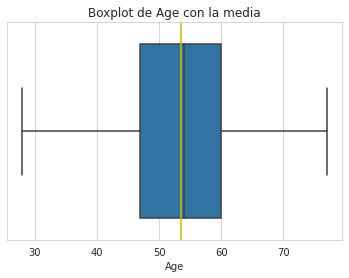

In [12]:
sns.set_style('whitegrid')
ax= sns.boxplot(x=df['Age'])
plt.axvline(df['Age'].mean(),c='y')
ax.set_title('Boxplot de Age con la media');

In [13]:
IQR = df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
filtro_sup = df['Age'] < df['Age'].quantile(0.75) + 1.5 * IQR
filtro_inf = df['Age'] > df['Age'].quantile(0.25) - 1.5 * IQR

df_filtrado = df[filtro_sup & filtro_inf]

Text(0.5, 1.0, 'Boxplot de Age con valores dentro del IQR ')

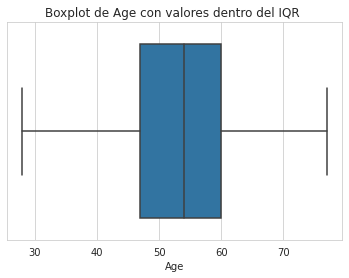

In [14]:
ax = sns.boxplot(x=df_filtrado['Age'])
ax.set_title('Boxplot de Age con valores dentro del IQR ') 

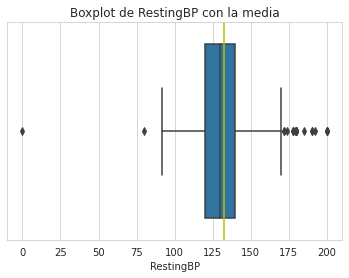

In [15]:
sns.set_style('whitegrid')
ax = sns.boxplot(x=df['RestingBP'])
plt.axvline(df['RestingBP'].mean(),c='y')
ax.set_title('Boxplot de RestingBP con la media');

Text(0.5, 1.0, 'Boxplot con los valores dentro del IQR de Resting BP')

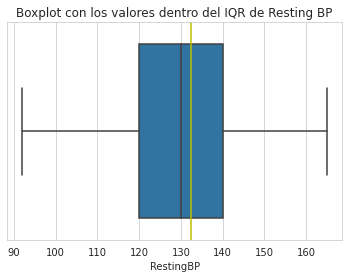

In [16]:
IQR = df['RestingBP'].quantile(0.75)-df['RestingBP'].quantile(0.25)
filtro_sup = df['RestingBP'] < df['RestingBP'].quantile(0.75) + 1.5 * IQR
filtro_inf = df['RestingBP'] > df['RestingBP'].quantile(0.25) - 1.5 * IQR

df_filtrado = df[filtro_sup & filtro_inf]
ax= sns.boxplot(x=df_filtrado['RestingBP'])
plt.axvline(df['RestingBP'].mean(),c='y')
ax.set_title('Boxplot con los valores dentro del IQR de Resting BP')

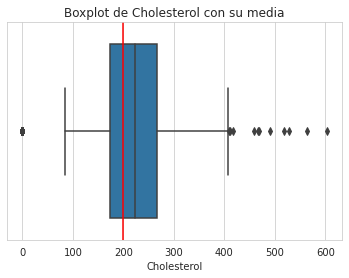

In [17]:
sns.set_style('whitegrid')
ax= sns.boxplot(x=df['Cholesterol'])
plt.axvline(df['Cholesterol'].mean(),c='r')
ax.set_title('Boxplot de Cholesterol con su media');

Text(0.5, 1.0, 'Boxplot de Cholesterol')

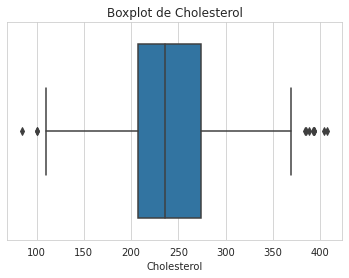

In [18]:
IQR = df['Cholesterol'].quantile(0.75)-df['Cholesterol'].quantile(0.25)
filtro_sup = df['Cholesterol'] < df['Cholesterol'].quantile(0.75) + 1.5 * IQR
filtro_inf = df['Cholesterol'] > df['Cholesterol'].quantile(0.25) - 1.5 * IQR

df_filtrado = df[filtro_sup & filtro_inf]

ax= sns.boxplot(x=df_filtrado['Cholesterol'])
ax.set_title('Boxplot de Cholesterol')

### Histogramas y tablas de frecuencia

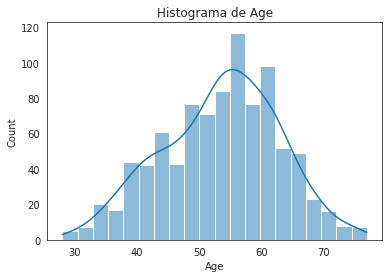

In [19]:
sns.set_style('white')
ax= sns.histplot(df['Age'],kde=True,bins=20)
ax.set_title('Histograma de Age');


In [20]:
age_arr=np.array(df['Age']) 
print(f'Curtosis: {kurtosis(age_arr)}')
print(f'Asimetría: {skew(age_arr)}')

Curtosis: -0.3905684960842244
Asimetría: -0.19561273124487544


Text(0.5, 1.0, 'Histograma de RestingBP')

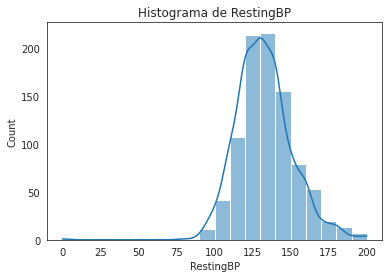

In [21]:
ax= sns.histplot(df['RestingBP'],kde=True,bins=20)
ax.set_title('Histograma de RestingBP')

In [22]:
restingBP_arr=np.array(df['RestingBP']) 
print(f'Curtosis: {kurtosis(restingBP_arr)}')
print(f'Asimetría: {skew(restingBP_arr)}')

Curtosis: 3.2469319615478724
Asimetría: 0.17954532149156327


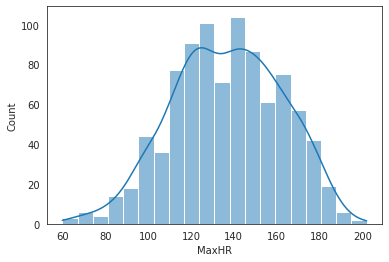

In [23]:
sns.histplot(df['MaxHR'],kde=True,bins=20);

In [24]:
MaxHR_arr=np.array(df['MaxHR']) 
print(f'Curtosis: {kurtosis(MaxHR_arr)}')
print(f'Asimetría: {skew(MaxHR_arr)}')

Curtosis: -0.4523389391469048
Asimetría: -0.14412342991429325


# Postwork S3.

    -Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
    
    -Identifica todas las variables categóricas en tu dataset.
    
    -Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
    
    -Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
    
    -Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
    
    -Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
    
    -De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.


In [25]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Las variables categóricas son: 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'

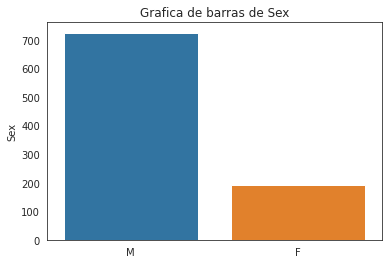

In [27]:
count1= df['Sex'].value_counts()
ax=sns.barplot(x=count1.index,y=count1)
ax.set_title('Grafica de barras de Sex');

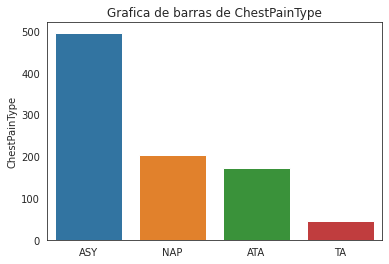

In [28]:
count2= df['ChestPainType'].value_counts()
ax=sns.barplot(x=count2.index,y=count2)
ax.set_title('Grafica de barras de ChestPainType');

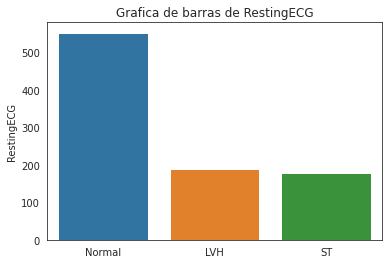

In [29]:
count3= df['RestingECG'].value_counts()
ax=sns.barplot(x=count3.index,y=count3)
ax.set_title('Grafica de barras de RestingECG');

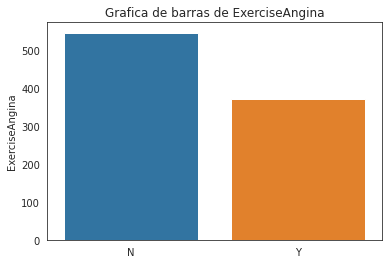

In [30]:
count4= df['ExerciseAngina'].value_counts()
ax=sns.barplot(x=count4.index,y=count4)
ax.set_title('Grafica de barras de ExerciseAngina');

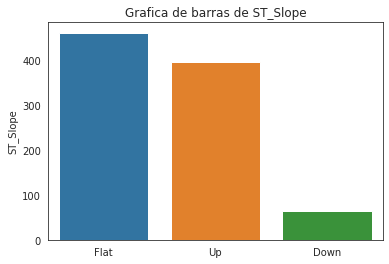

In [31]:
count5= df['ST_Slope'].value_counts()
ax=sns.barplot(x=count5.index,y=count5)
ax.set_title('Grafica de barras de ST_Slope');

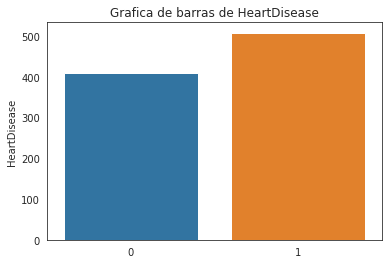

In [32]:
count6= df['HeartDisease'].value_counts()
ax=sns.barplot(x=count6.index,y=count6)
ax.set_title('Grafica de barras de HeartDisease');

In [33]:
cross1= pd.crosstab(df['HeartDisease'],[df['ChestPainType'],df['ST_Slope']])
cross1

ChestPainType  ASY           ATA            NAP            TA         
ST_Slope      Down Flat  Up Down Flat   Up Down Flat  Up Down Flat  Up
HeartDisease                                                          
0                4   29  71    2   14  133    5   29  97    3    7  16
1               42  289  61    1   18    5    5   59   8    1   15   4

In [34]:
cross2= pd.crosstab(df['Sex'],[df['RestingECG'],df['ExerciseAngina']])
cross2

RestingECG     LVH     Normal       ST    
ExerciseAngina   N   Y      N    Y   N   Y
Sex                                       
F               36  11     93   25  21   7
M               79  62    252  182  66  84

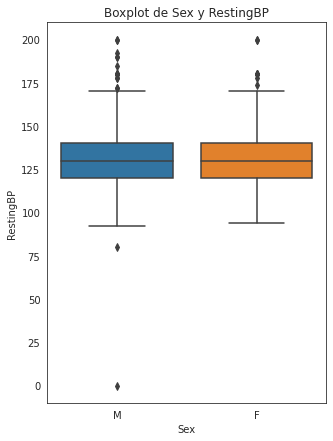

In [35]:
plt.figure(figsize=(5,7))
ax=sns.boxplot(data=df, x='Sex', y='RestingBP')
ax.set_title('Boxplot de Sex y RestingBP');

La presion arterial pafece no depender del sexo, ambas graficas son muy parecidas.

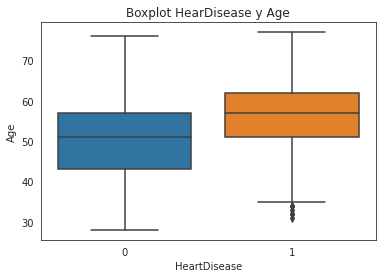

In [36]:
ax=sns.boxplot(data=df,x='HeartDisease',y='Age')
ax.set_title('Boxplot HearDisease y Age');

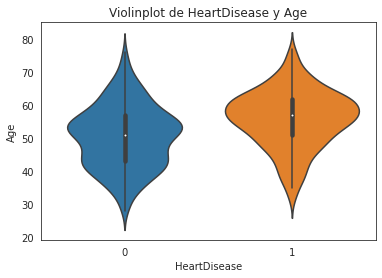

In [37]:
ax=sns.violinplot(data=df,x='HeartDisease',y='Age')
ax.set_title('Violinplot de HeartDisease y Age');

Vemos que las personas que murieron por una insuficiencia cardiaca tienen en general una edad más avanzada, al rededor de los 60 años se concentra la mayoria.

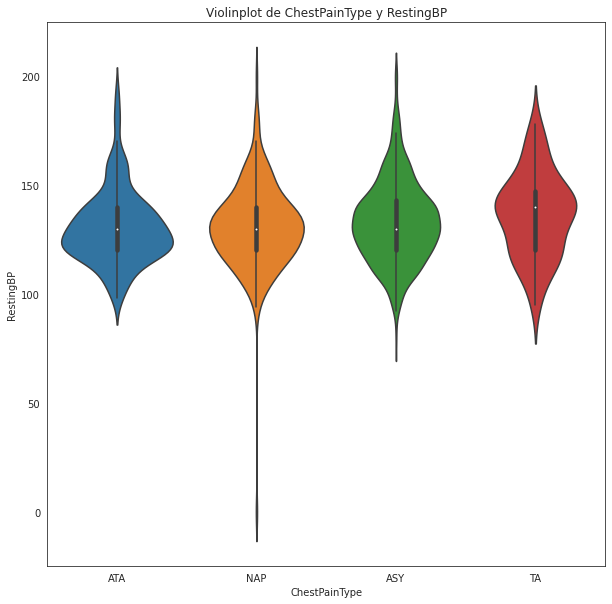

In [38]:
plt.figure(figsize=(10,10))
ax=sns.violinplot(data=df,x='ChestPainType',y='RestingBP')
ax.set_title('Violinplot de ChestPainType y RestingBP');

Al parecer el tipo de dolor de pecho no influye en la presion arterial de los pacientes, ya que los 4 violinplots son muy similares.

# Postwork S4.

Identifica cuáles son las variables numéricas en tu dataset.

Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.

Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.

Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.

Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.

Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.



In [41]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [49]:
# obtenemos el dataframe con las variables numericas
df_numeric= df[['Age','Cholesterol','RestingBP','MaxHR','Oldpeak']]
df_numeric.head(5)

,Age,Cholesterol,RestingBP,MaxHR,Oldpeak
0,40,289,140,172,0.0
1,49,180,160,156,1.0
2,37,283,130,98,0.0
3,48,214,138,108,1.5
4,54,195,150,122,0.0


In [50]:
df_numeric.corr()

,Age,Cholesterol,RestingBP,MaxHR,Oldpeak
Age,1.000000,-0.095282,0.254399,-0.382045,0.258612
Cholesterol,-0.095282,1.000000,0.100893,0.235792,0.050148
RestingBP,0.254399,0.100893,1.000000,-0.112135,0.164803
MaxHR,-0.382045,0.235792,-0.112135,1.000000,-0.160691
Oldpeak,0.258612,0.050148,0.164803,-0.160691,1.000000


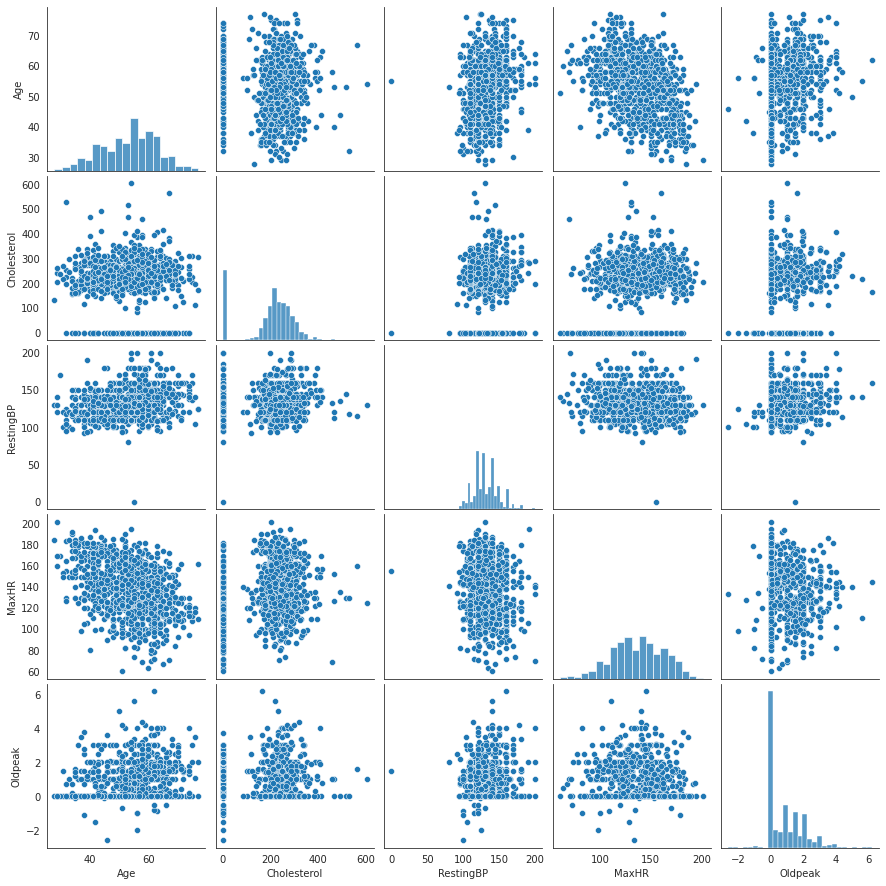

In [52]:
sns.pairplot(df_numeric); 

Considerando que un valor cero de colesterol y oldpeak son incorrectos, vamos a remover aquellos valores de la variable con valor igual a cero.

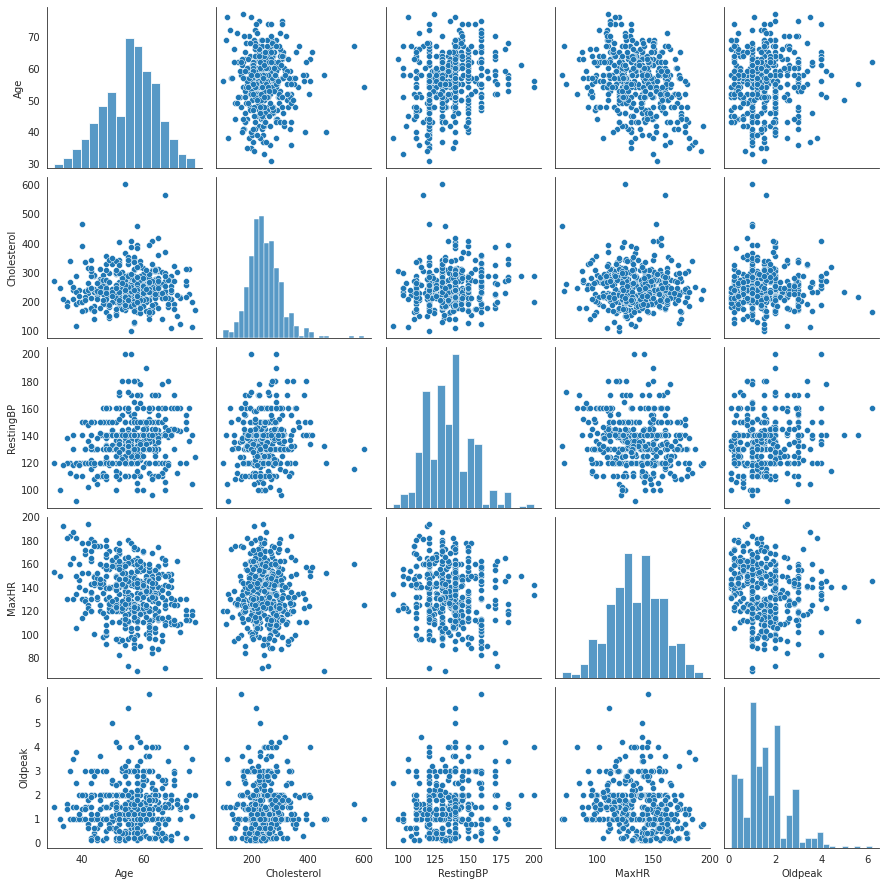

In [57]:
df_no_zeros=(df_numeric['Cholesterol']>0) & (df_numeric['Oldpeak']>0)
df_numeric=df_numeric[df_no_zeros]
sns.pairplot(df_numeric)

In [58]:
df_numeric.corr()

,Age,Cholesterol,RestingBP,MaxHR,Oldpeak
Age,1.000000,0.013596,0.225663,-0.282865,0.066119
Cholesterol,0.013596,1.000000,0.103234,-0.023355,0.009582
RestingBP,0.225663,0.103234,1.000000,-0.145679,0.170175
MaxHR,-0.282865,-0.023355,-0.145679,1.000000,-0.144427
Oldpeak,0.066119,0.009582,0.170175,-0.144427,1.000000


Vemos que la variable que sufrió un amyor impacto fue 'Oldpeak', debido a que quitamos los ceros. Sin embargo, la mayoria de las demas correlaciones no tuvo un cambio significativo.

## Regresion Lineal 

In [59]:
from sklearn.linear_model import LinearRegression

In [65]:
# seleccionamos la columna x=Age y y=Oldpeak
x= df_numeric['Age']
y= df_numeric['Oldpeak']

In [67]:
lr= LinearRegression()
lr.fit(x.to_frame(),y)

LinearRegression()

In [69]:
y_predict=lr.predict(x.to_frame())

/home/armd22a/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/armd22a/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


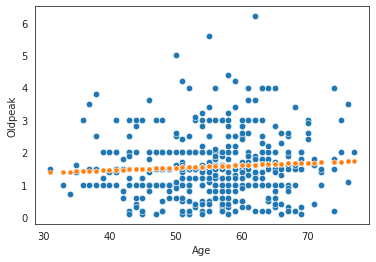

In [71]:
sns.scatterplot(x,y,s=40)
sns.scatterplot(x,y_predict,s=25);

/home/armd22a/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/armd22a/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


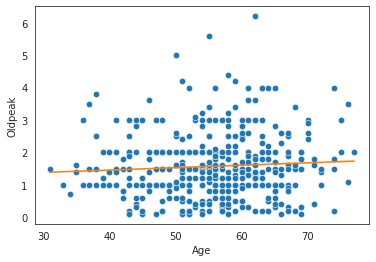

In [74]:
sns.scatterplot(x,y,s=40)
sns.lineplot(x,y_predict,color='#FF7F0E');

In [81]:
intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'y = {coefficient} * x + {intercept}')

y = 0.007492400408459599 * x + 1.1539751323657013


In [82]:
# Ahora calculamos el valor de determinacion
print(f'R2: {lr.score(x.to_frame(), y)}')

R2: 0.004371675998074642


Regresion lineal entre MaxHR y Age

In [85]:
x= df_numeric['MaxHR']
y= df_numeric['Age']

In [88]:
lr = LinearRegression()
lr.fit(x.to_frame(),y)

LinearRegression()

In [89]:
y_predict= lr.predict(x.to_frame())

/home/armd22a/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/armd22a/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


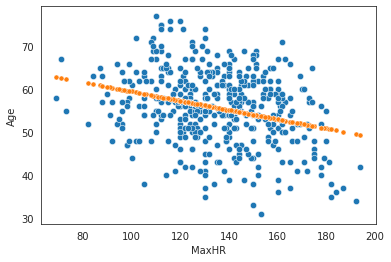

In [90]:
sns.scatterplot(x,y,s=40)
sns.scatterplot(x,y_predict,s=25);

In [95]:
intercept = lr.intercept_
coefficent = lr.coef_[0]
print(f'y=  {coefficent}*x + {intercept}')


y=  -0.1075846985110413*x + 70.24776331720679


In [96]:
print(f'R2:{lr.score(x.to_frame(),y)}')

R2:0.08001253557298749


In [ ]:
Ninguna de las dos regresiones aplicadas es un buen modelo para describir la relacion entre las variables seleccionadas